# **Sprint 4. Análisis de Datos estadísticos**

**Obejtivo**
1. Realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña, son datos de 500 clientes de Megaline: quiénes son, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018.
2. Analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Descripción de los datos**

Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto.Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.
 



## **Paso 1. Cargando datasets, importando librerías y mostrando la información general.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial

In [ ]:
calls    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')
messages  = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')
plans    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')
users    = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')

La tabla calls contiene las siguientes columnas:
* `id` - identificador único de llamada
* `call_date` - fecha de la llamada
* `duration` - duración en minutos de la llamada
* `user_id` - identificador del usuario que realiza las llamadas

In [ ]:
print('Llamadas Megaline:')
calls.info() #No hay valores ausentes en las filas a primera vista. Habrá que verificar el contenido después.

Llamadas Megaline:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


La tabla internet contiene:
* `id` - identificador único de la sesión
* `mb_used` - volumen de datos por sesión en megabytes
* `session_date` - fecha de la sesión
* `id`identificador del usuario

In [ ]:
print('Internet Megacable:')
internet.info() #tampoco parece haber datos faltantes en este dataframe.

Internet Megacable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


La tabla messages contiene:
* `id` - identificador único del mensaje
* `message date` - fecha del mensaje
* `id` - identificador del usuario

In [ ]:
print('Mensajes Megacable:')
messages.info()

Mensajes Megacable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


El dataframe de los users contiene la información personal de los clientes:
* `user_id` — identificador único del usuario
* `first_name` — nombre del usuario
* `last_name` — apellido del usuario
* `age` — edad del usuario (en años)
* `reg_date` — fecha de suscripción (dd, mm, aa)
* `churn_date` — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)

In [ ]:
print('Usuarios Megacable:')
users.info()

Usuarios Megacable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


La tabla plan name contiene los datos sobre las tarifas:
* `plan_name` — nombre de la tarifa
* `usd_monthly_fee` — pago mensual en dólares estadounidenses
* `minutes_included` — minutos incluidos al mes
* `messages_included` — SMS incluidos al mes
* `mb_per_month_included` — datos incluidos al mes (en megabytes)
* `usd_per_minute` — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
* `usd_per_message` — precio por SMS tras exceder los límites del paquete
* `usd_per_gb` — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

In [ ]:
print('Planes Megacable:')
plans.info()

Planes Megacable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


No parece haber datos faltantes en ninguno de los dataframes. Todos los dataframes excepto el de los usuarios, tienen las filas de sus columnas completas. Usuarios no, porque los valores de `churn_date` que no se encuentran registrados hacen referencia a la fecha en la que el usuario dejó el servicio, si no hay fecha para cuando dejaron el servicio quiere decir que seguían con su plan de pago cuando se hizo este registro.
Esta columna, de 500 entradas sólo dejó 34 filas rellenadas, lo que quiere decir que el 93% de los usuarios estaban con el servicio activo, mientras que el 7% ya había terminado su relación con Megacable.

## **Paso 2. Preprocesando los datos.**

Vamos a revisar las tablas y sus columnas para realizar un mejor análisis de los datos.

## Preprocesando `users`

In [ ]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'].isna().sum()
# El número de usuarios que no tienen una fecha de `churn_date`, o sea que tenían el contrato aún activo.
# Vamos a reemplazar esos valores sin fecha con 31 de diciembre de 2018 que es el año en que se llevo a cabo la recolección de datos

466

In [ ]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [ ]:
users['churn_date'] = users['churn_date'].fillna('1800-02-30')
users.head(10)
# Aquí ya llenamos los valroes ausentes de las fechas en `churn_date` con el 30 de febrero de 1800 (:
# Esto es para delimitar el tiempo que se está considerando en el análisis que es el año 2018.

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,1800-02-30
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,1800-02-30
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,1800-02-30
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,1800-02-30
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,1800-02-30
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,1800-02-30
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18 00:00:00
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,1800-02-30
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,1800-02-30
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,1800-02-30


## Preprocesando `calls`

In [ ]:
calls.head()


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


In [ ]:
calls.describe()

,user_id,duration,month
count,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.875907,9.319231
std,139.475249,5.355181,2.415025
min,1000.000000,1.000000,1.000000
25%,1127.000000,5.000000,8.000000
50%,1247.000000,8.000000,10.000000
75%,1365.000000,12.000000,11.000000
max,1499.000000,38.000000,12.000000


Text(0.5, 1.0, 'Duración de las llamadas de usuarios Megacable')

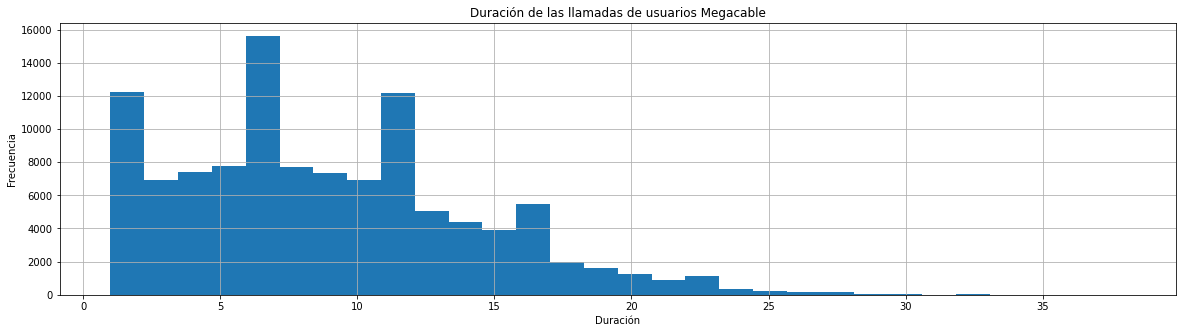

In [ ]:
calls['duration'].hist(bins=30, figsize=(20, 5))
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.title("Duración de las llamadas de usuarios Megacable")

In [ ]:
calls[calls['duration'] == 0.00].value_counts().sum()

0

Aquí podemos ver que en `duration` tenemos 26,834 llamadas en 0.00 minutos (llamadas no conectadas), que representan un  llamadas rechazadas, fallidas o no contestadas. 
Todas las llamadas que no fueron conectadas representan el 20% del total de los datos de este dataframe. Al tener duración 0 no son consideradas para el cargo del sevicio de los planes, ya que ese comienza a cobrarse por minuto desde el segundo 1, así que nos desharemos de esas llamadas no conectadas.

In [ ]:
calls.drop(calls[calls['duration'] == 0].index, inplace=True)
# aquí nos deshacemos de las llamadas que tienen duración igual a 0.00.
# La duración de las llamadas se encuentra en minutos. 

Text(0.5, 1.0, 'Duración de las llamadas de usuarios Megacable')

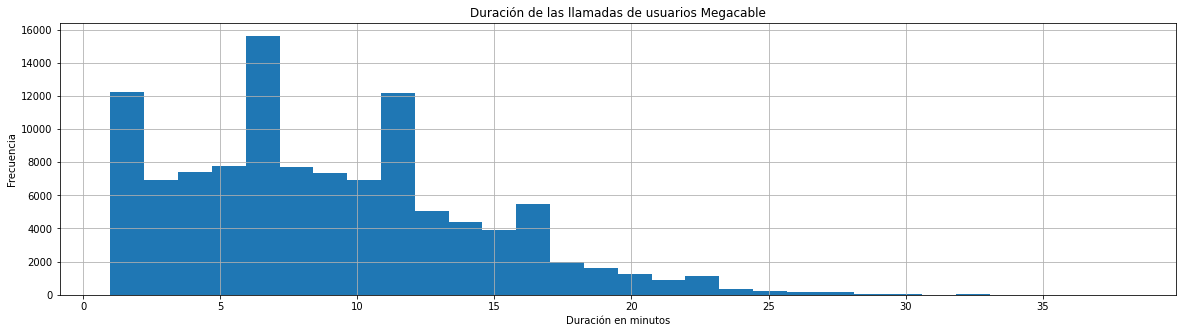

In [ ]:
calls['duration'].hist(bins=30, figsize=(20, 5))
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title("Duración de las llamadas de usuarios Megacable")

In [ ]:
calls.value_counts('duration').sum()
# Menos entradas en el nuevo calls filtrado, tenemos el 80% de los datos del calls original.

110901

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')
calls.head() 

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [ ]:
calls.info()
# Los 481 usuarios en user_id ahora son strings porque es un valor categórico, no es precisamente numérico o cuantitativo (aunque tenga números). 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  int64         
 4   month      110901 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.1+ MB


In [ ]:
len(calls['user_id'].unique())

481

Text(0.5, 1.0, 'Duración de las llamadas por usuario')

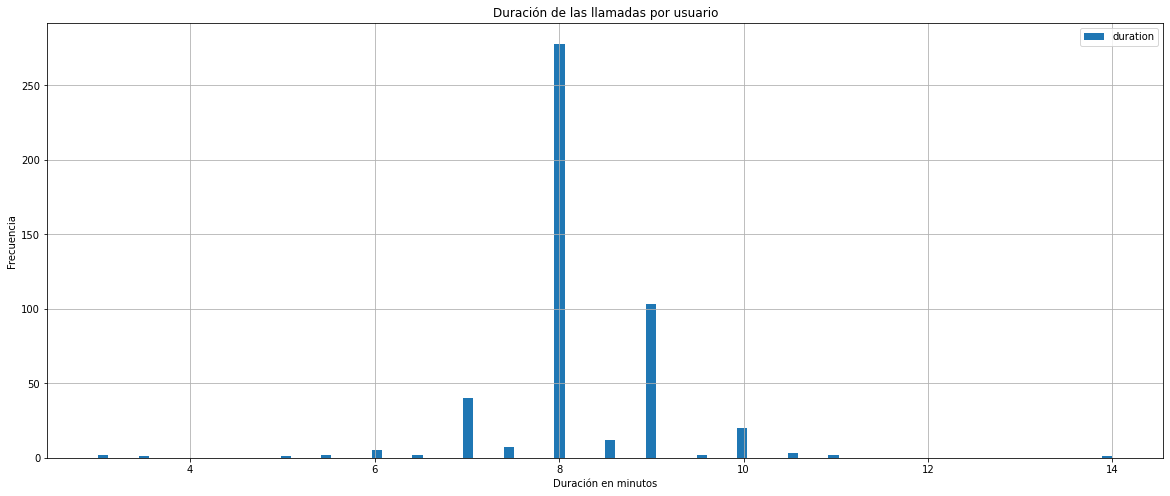

In [ ]:
calls.pivot_table(index='user_id', values='duration', aggfunc='median').plot(kind='hist', grid=True, bins= 100, figsize=(20, 8))
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title("Duración de las llamadas por usuario")
# Mayor frecuencia de usuarios con un valor medio de duración de llamadas, 7.7 minutos.

In [ ]:
calls.describe()# media y mediana de la duración en minutos 

,user_id,duration,month
count,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.875907,9.319231
std,139.475249,5.355181,2.415025
min,1000.000000,1.000000,1.000000
25%,1127.000000,5.000000,8.000000
50%,1247.000000,8.000000,10.000000
75%,1365.000000,12.000000,11.000000
max,1499.000000,38.000000,12.000000


In [ ]:
#calls['duration'] = np.ceil(calls['duration'])
calls['month'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d').dt.month
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_pivot.columns = ['count_calls','duration_calls']
calls_pivot
# Aquí ya tenemos una columna nueva que muestra el número de mes y la duración total en minutos del total de llamadas realizadas

count_calls  duration_calls
user_id month                             
1000    12              16             124
1001    8               22             182
        9               38             315
        10              47             393
        11              49             426
...                    ...             ...
1498    12              32             339
1499    9               35             346
        10              41             385
        11              39             308
        12              56             496

[2256 rows x 2 columns]

## Preprocesando `internet`

In [ ]:
internet['month'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d').dt.month
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.212949
104821,1499_216,1499,2018-12-30,304.72,12,0.297578
104822,1499_217,1499,2018-09-22,292.75,9,0.285889
104823,1499_218,1499,2018-12-07,0.00,12,0.000000


En este dataframe tenemos la cantidad de megabytes que utilizaron nuestros clientes de acuerdo a el usuario y la duración total del total de sesiones de navegación que tuvieron. Vamos a calcular el volumen de datos utilizados en gigabytes, se cobra el gigabyte completo desde el primer mg.

In [ ]:
internet

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,0.212949
104821,1499_216,1499,2018-12-30,304.72,12,0.297578
104822,1499_217,1499,2018-09-22,292.75,9,0.285889
104823,1499_218,1499,2018-12-07,0.00,12,0.000000


In [ ]:
internet['gb_used'] = internet['mb_used'] / 1024
internet_usage = internet.pivot_table(values=['mb_used', 'gb_used'], index=['user_id', 'month'], aggfunc='sum')
internet_usage['gb_used'] = internet_usage['gb_used'].apply(np.ceil)

In [ ]:
# Convirtiendo mb a gb y creando nueva columna con el total
internet_usage

gb_used   mb_used
user_id month                   
1000    12         2.0   1901.47
1001    8          7.0   6919.15
        9         14.0  13314.82
        10        22.0  22330.49
        11        19.0  18504.30
...                ...       ...
1498    12        23.0  23137.69
1499    9         13.0  12984.76
        10        20.0  19492.43
        11        17.0  16813.83
        12        22.0  22059.21

[2277 rows x 2 columns]

## Preprocesando `messages`

In [ ]:
messages['month'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d').dt.month
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [ ]:
messages['month'].unique()

array([12, 11,  8, 10,  9,  6,  7,  5,  4,  3,  2,  1])

In [ ]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], aggfunc='count').drop(columns='id')

In [ ]:
messages_pivot

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1496    9                21
        10               18
        11               13
        12               11
1497    12               50

[1806 rows x 1 columns]

Hasta este punto tenemos una columna nueva en cada uno de los dataframes que estamos analizando (`month`) y también `user_id`. Las tenemos en común en los dataframes `calls`, `messages` e `internet`. Las pivot tables que calculamos para cada uno de los dataframes son las que vamos a combinar para tener todos los datos que necesitamos para calcular el ingreso que cada usuario representa de acuerdo al número de llamadas realizadas y minutos utilizados, la cantidad de mensajes y los gb utilizados en las sesiones de navegación. Obtendremos un dataframe más grande.

## Agrupando datos

In [ ]:
summary_users = pd.concat([calls_pivot, messages_pivot, internet_usage], axis=1, join='outer').reset_index()

In [ ]:
summary_users

,user_id,month,count_calls,duration_calls,message_date,gb_used,mb_used
0,1000,12,16.0,124.0,11.0,2.0,1901.47
1,1001,8,22.0,182.0,30.0,7.0,6919.15
2,1001,9,38.0,315.0,44.0,14.0,13314.82
3,1001,10,47.0,393.0,53.0,22.0,22330.49
4,1001,11,49.0,426.0,36.0,19.0,18504.30
...,...,...,...,...,...,...,...
2288,1498,12,32.0,339.0,NaN,23.0,23137.69
2289,1499,9,35.0,346.0,NaN,13.0,12984.76
2290,1499,10,41.0,385.0,NaN,20.0,19492.43
2291,1499,11,39.0,308.0,NaN,17.0,16813.83


In [ ]:
plans = plans.rename(columns= {'plan_name': 'plan'})
plans.info()
# Aquí estamos renombrando la columna a `plan` con el objetivo de utilizar .merge() para acercarnos más al valor de los ingresos por usuario según su actividad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
summary_users= summary_users.merge(users.merge(plans, on='plan', how='left'), on='user_id', how='right')
summary_users.groupby('user_id').size()
# Esta es la comprobación de que tenemos 500 usuarios con los que estamos trabajando.

user_id
1000     1
1001     5
1002     3
1003     1
1004     8
        ..
1495     4
1496     5
1497     1
1498    11
1499     4
Length: 500, dtype: int64

In [ ]:
summary_users

,user_id,month,count_calls,duration_calls,message_date,gb_used,mb_used,first_name,last_name,age,...,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,1901.47,Anamaria,Bauer,45,...,2018-12-24,ultimate,1800-02-30,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,22.0,182.0,30.0,7.0,6919.15,Mickey,Wilkerson,28,...,2018-08-13,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
2,1001,9.0,38.0,315.0,44.0,14.0,13314.82,Mickey,Wilkerson,28,...,2018-08-13,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
3,1001,10.0,47.0,393.0,53.0,22.0,22330.49,Mickey,Wilkerson,28,...,2018-08-13,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
4,1001,11.0,49.0,426.0,36.0,19.0,18504.30,Mickey,Wilkerson,28,...,2018-08-13,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,32.0,339.0,NaN,23.0,23137.69,Scot,Williamson,51,...,2018-02-04,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
2299,1499,9.0,35.0,346.0,NaN,13.0,12984.76,Shena,Dickson,37,...,2018-05-06,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
2300,1499,10.0,41.0,385.0,NaN,20.0,19492.43,Shena,Dickson,37,...,2018-05-06,surf,1800-02-30,50,15360,500,20,10,0.03,0.03
2301,1499,11.0,39.0,308.0,NaN,17.0,16813.83,Shena,Dickson,37,...,2018-05-06,surf,1800-02-30,50,15360,500,20,10,0.03,0.03


Ahora en esta pivot hemos calculado el número de mensajes utilizados por cada usuario y por mes. Y con todos estos datos por usuario y mes de las llamadas, mensajes y gb de navegación vamos a calcular los ignresos que cada usuario representa en la compañía Megaline según su plan de datos.

In [ ]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
summary_users['gb_per_month_included'] = summary_users['mb_per_month_included'] / 1024

In [ ]:
summary_users[['gb_per_month_included', 'mb_per_month_included']].head(5) # Para hacer los cálculos en gb

,gb_per_month_included,mb_per_month_included
0,30.0,30720
1,15.0,15360
2,15.0,15360
3,15.0,15360
4,15.0,15360


In [ ]:
summary_users.fillna(0, inplace=True)
summary_users

,user_id,month,count_calls,duration_calls,message_date,gb_used,mb_used,first_name,last_name,age,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12.0,16.0,124.0,11.0,2.0,1901.47,Anamaria,Bauer,45,...,ultimate,1800-02-30,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8.0,22.0,182.0,30.0,7.0,6919.15,Mickey,Wilkerson,28,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
2,1001,9.0,38.0,315.0,44.0,14.0,13314.82,Mickey,Wilkerson,28,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
3,1001,10.0,47.0,393.0,53.0,22.0,22330.49,Mickey,Wilkerson,28,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
4,1001,11.0,49.0,426.0,36.0,19.0,18504.30,Mickey,Wilkerson,28,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,32.0,339.0,0.0,23.0,23137.69,Scot,Williamson,51,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
2299,1499,9.0,35.0,346.0,0.0,13.0,12984.76,Shena,Dickson,37,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
2300,1499,10.0,41.0,385.0,0.0,20.0,19492.43,Shena,Dickson,37,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0
2301,1499,11.0,39.0,308.0,0.0,17.0,16813.83,Shena,Dickson,37,...,surf,1800-02-30,50,15360,500,20,10,0.03,0.03,15.0


In [ ]:
summary_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2303 non-null   float64       
 2   count_calls            2303 non-null   float64       
 3   duration_calls         2303 non-null   float64       
 4   message_date           2303 non-null   float64       
 5   gb_used                2303 non-null   float64       
 6   mb_used                2303 non-null   float64       
 7   first_name             2303 non-null   object        
 8   last_name              2303 non-null   object        
 9   age                    2303 non-null   int64         
 10  city                   2303 non-null   object        
 11  reg_date               2303 non-null   datetime64[ns]
 12  plan                   2303 non-null   object        
 13  chu

In [ ]:
plans[plans['plan'] == 'surf']['minutes_included'].min()

500

In [ ]:
def calculate_profit(item):
    def positive_result(number):
        if number < 0:
            return 0
        else:
            return number
    
    plan = users[users['user_id'] == item['user_id']]['plan'].min()
    tariff = plans[plans['plan'] == plan]

    # Tomamos el valor de los minutos incluidos en el paquete que tiene cada usuario según minutos, mensajes y gb
    minutes_included  = tariff['minutes_included'].min()
    messages_included = tariff['messages_included'].min()
    gb_included = tariff['mb_per_month_included'].min() / 1024

    # Restamos la cantidad de minutos llamadas y gb utilizados por el usuario al mes, y le restamos lo que incluye cada plan.
    #Esta es la diferencia de lo que pagan los usuarios según el plan, que representa un ingreso a la empresa.
    minutes_not_included  = positive_result( item['count_calls'] - minutes_included )
    messages_not_included = positive_result( item['message_date'] - messages_included )
    gb_not_included = positive_result( item['gb_used']  - gb_included )

    # Se calcula el ingreso
    profit = ( 
        tariff['usd_monthly_pay'].min() 
        + minutes_not_included  * tariff['usd_per_minute'].min()
        + messages_not_included * tariff['usd_per_message'].min()
        + gb_not_included * tariff['usd_per_gb'].min()
    )
    return profit

summary_users['profit'] = summary_users.apply(calculate_profit, axis=1)
megaline_data = summary_users[['user_id', 'month', 'duration_calls', 'count_calls', 'message_date', 'gb_used', 'plan', 'profit']]
megaline_data

,user_id,month,duration_calls,count_calls,message_date,gb_used,plan,profit
0,1000,12.0,124.0,16.0,11.0,2.0,ultimate,70.00
1,1001,8.0,182.0,22.0,30.0,7.0,surf,20.00
2,1001,9.0,315.0,38.0,44.0,14.0,surf,20.00
3,1001,10.0,393.0,47.0,53.0,22.0,surf,90.09
4,1001,11.0,426.0,49.0,36.0,19.0,surf,60.00
...,...,...,...,...,...,...,...,...
2298,1498,12.0,339.0,32.0,0.0,23.0,surf,100.00
2299,1499,9.0,346.0,35.0,0.0,13.0,surf,20.00
2300,1499,10.0,385.0,41.0,0.0,20.0,surf,70.00
2301,1499,11.0,308.0,39.0,0.0,17.0,surf,40.00


Ahora ya hemos calculado el ingreso que representa cada usuario por mes de acuerdo a sus llamadas, mensajes y sesiones de navegación. Por fin, es hora del:

## **Paso 3. Análisis de Datos**

Aquí vamos a revisar el comportamiento de los clientes (by= `user_id`) según el plan que tienen contratado y los servicios de llamadas, mensajes y datos de navegación.

In [ ]:
plan_surf = users.query('plan == "surf"')['user_id']
plan_ultimate = users.query('plan == "ultimate"')['user_id']

## Histograma de la distribución de `calls` de acuerdo con su duración por plan.

In [ ]:
calls_pivot_surf = calls_pivot.query('user_id in @plan_surf')
calls_pivot_surf.describe() #Distribución de la duración de llamadas en el plan Surf.

,count_calls,duration_calls
count,1544.000000,1544.000000
mean,49.143135,436.802461
std,25.304258,229.088544
min,1.000000,2.000000
25%,32.000000,279.000000
50%,48.000000,430.000000
75%,65.000000,579.000000
max,167.000000,1510.000000


In [ ]:
calls_pivot_ultimate = calls_pivot.query('user_id in @plan_ultimate')
calls_pivot_ultimate.describe() # Distribución de llamadas en el plan Ultimate.

,count_calls,duration_calls
count,712.000000,712.000000
mean,49.191011,435.286517
std,26.457567,237.459650
min,2.000000,10.000000
25%,30.000000,263.000000
50%,48.000000,425.500000
75%,64.000000,566.000000
max,156.000000,1369.000000


In [ ]:
def bye_outliers(name_df,column): # Función para eliminar valores atípicos de la distribución.
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)

In [ ]:
surf_duration_calls_outliers = bye_outliers(calls_pivot_surf,'duration_calls')
ultimate_duration_calls_outliers  = bye_outliers(calls_pivot_ultimate,'duration_calls')
# Creando una nueva variable en la que no se consideran los valores atípicos o outliers para seguir con el posterior análisis estadístico.

In [ ]:
calls_pivot_surf_filtered = (calls_pivot_surf.query(
    '@surf_duration_calls_outliers[0] < duration_calls < @surf_duration_calls_outliers[1]'))
calls_pivot_surf_filtered.describe()

,count_calls,duration_calls
count,1515.000000,1515.000000
mean,47.702970,423.438944
std,23.207301,209.183970
min,1.000000,2.000000
25%,32.000000,278.000000
50%,48.000000,425.000000
75%,63.000000,567.500000
max,124.000000,1021.000000


In [ ]:
calls_pivot_ultimate_filtered = (calls_pivot_ultimate.query(
    '@ultimate_duration_calls_outliers[0] < duration_calls < @ultimate_duration_calls_outliers[1]'))
calls_pivot_ultimate_filtered.describe()

,count_calls,duration_calls
count,696.000000,696.000000
mean,47.274425,418.265805
std,23.439393,211.128171
min,2.000000,10.000000
25%,30.000000,261.500000
50%,48.000000,421.000000
75%,63.000000,551.250000
max,123.000000,1020.000000


Para las llamadas surfer ya filtradas, tenemos el 98% de los datos originales de los usuarios de este plan. Y en la tabla filtrada de los usuarios del plan ultimate, tenemos el 97%. En ambos grupos removimos un porcentaje pequeño de las llamadas atípicas, y algunos valores de los estadísticos tanto para surfers y ultimaters cambiaron un poco, esto quiere decir que aún tenemos datos que representan bien la muestra, aunque tenemos menos.

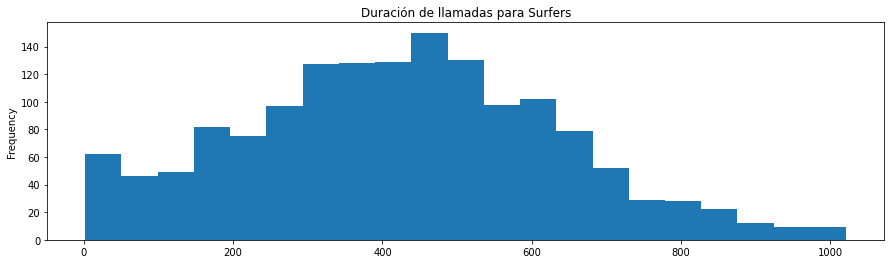

In [ ]:
calls_pivot_surf_filtered['duration_calls'].plot(
    kind     = 'hist'
    ,title   = 'Duración de llamadas para Surfers'
    ,bins    = 21
    ,figsize = (15, 4)
 )

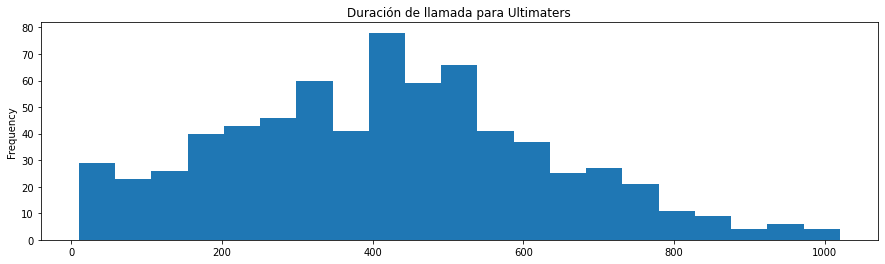

In [ ]:
calls_pivot_ultimate_filtered['duration_calls'].plot(
    kind     = 'hist'
    ,title   = 'Duración de llamada para Ultimaters'
    ,bins    = 21
    ,figsize = (15, 4)
 )

Hasta ahora hemos eliminado los valores atípicos de las llamadas de ambos planes que utilizan los usuaruos, haremos lo mismo con las llamadas y los mensajes. Podemos observar que la distribución para llamadas ultimaters es menos uniforme que para las llamadas surfers, ambas lucen normales. La duración de llamadas para los surfers parece variar un poco de la de nuestros usuarios ultimaters. En ambos grupos podemos observar que la duración de llamadas se encuentra dentro de un rango de 30-60 minutos aproximadamente, pero por la cantidad de datos que tenemos en ambos grupos, los surfers tienen una frecuencia mayor en casi todo el espectro de la duración. 

## Histograma de la distribución de `messages` de acuerdo con la cantidad de mensajes enviados por plan.

In [ ]:
message_pivot_surf = messages_pivot.query('user_id in @plan_surf')
message_pivot_surf.describe()

,message_date
count,1222.000000
mean,40.109656
std,33.035500
min,1.000000
25%,16.000000
50%,32.000000
75%,54.000000
max,266.000000


In [ ]:
message_pivot_ultimate = messages_pivot.query('user_id in @plan_ultimate')
message_pivot_ultimate.describe()

,message_date
count,584.000000
mean,46.296233
std,32.942118
min,1.000000
25%,21.000000
50%,41.000000
75%,66.000000
max,166.000000


In [ ]:
surf_message_outliers = bye_outliers(message_pivot_surf,'message_date')
ultimate_message_outliers = bye_outliers(message_pivot_ultimate,'message_date')

In [ ]:
message_pivot_surf_filtered = (
    message_pivot_surf.query('message_date < @surf_message_outliers[1] & message_date > @surf_message_outliers[0]')
)
message_pivot_surf_filtered.describe()

,message_date
count,1169.000000
mean,35.577417
std,25.201266
min,1.000000
25%,15.000000
50%,31.000000
75%,50.000000
max,110.000000


In [ ]:
message_pivot_ultimate_filtered = (
    message_pivot_ultimate.query('message_date < @ultimate_message_outliers[1] & message_date > @ultimate_message_outliers[0]')
)
message_pivot_ultimate_filtered.describe()

,message_date
count,572.000000
mean,44.138112
std,29.661904
min,1.000000
25%,20.000000
50%,39.500000
75%,65.000000
max,131.000000


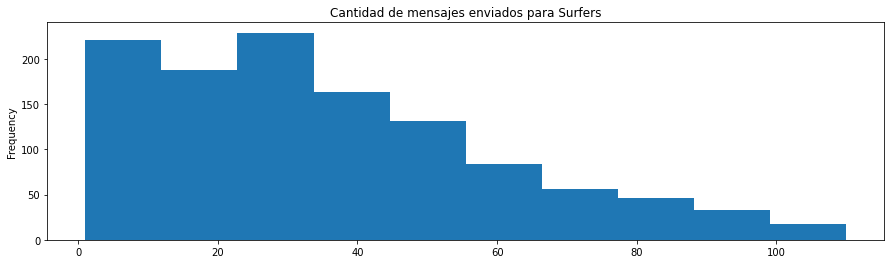

In [ ]:
message_pivot_surf_filtered['message_date'].plot(
    kind     = 'hist'
    ,title   = 'Cantidad de mensajes enviados para Surfers'
    ,figsize = (15, 4)
 )

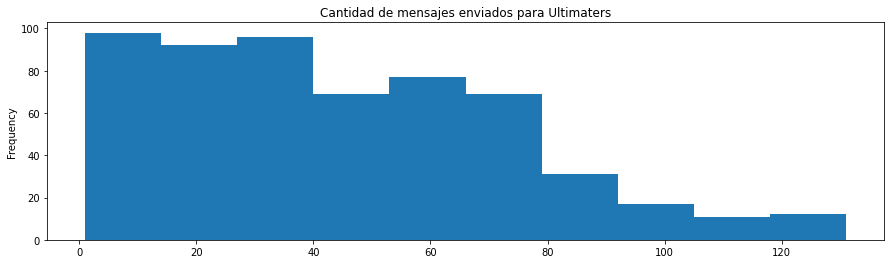

In [ ]:
message_pivot_ultimate_filtered['message_date'].plot(
    kind     = 'hist'
    ,title   = 'Cantidad de mensajes enviados para Ultimaters'
    ,figsize = (15, 4)
 )

En ambos grupos de plan tarifario podemos observar una distribución hacia la derecha. Podemos observar que la mayoría de los usuarios se encuentran dentro de un rango de 1 a 50 mensajes enviados por mes (del plan Surf). En el plan Ultimate el rango de mensajes enviados en el que se encuentra la mayoría de los usuarios es similar (1-65). Son los menos los que envían más de 65 mensajes (en el grupo de usuarios del plan Ultimate), se puede ver marcado en el histograma la diferencia. La cantidad de usuarios en el pla Surf podría ser la que hace que no se note tan marcada la diferencia después del tercer cuartil.

## Histograma de la distribución de `internet` de acuerdo con los gb utilizados por plan.

In [ ]:
internet_pivot_surf = internet_usage.query('user_id in @plan_surf')
internet_pivot_surf.describe()

,gb_used,mb_used
count,1558.000000,1558.000000
mean,16.831194,16717.702137
std,7.711922,7884.682983
min,1.000000,92.310000
25%,12.000000,12187.955000
50%,17.000000,16923.830000
75%,21.000000,21039.860000
max,70.000000,70931.590000


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Como ya te comenté arriba, tienes errorcitos en tu dataframe de internet_usage y por eso lo que obtienes en esta sección es incorrecto~~
</div>

In [ ]:
internet_pivot_ultimate = internet_usage.query('user_id in @plan_ultimate')
internet_pivot_ultimate.describe()

,gb_used,mb_used
count,719.000000,719.000000
mean,17.331015,17238.642253
std,7.648185,7831.018323
min,1.000000,233.170000
25%,13.000000,12671.130000
50%,17.000000,16863.450000
75%,21.000000,21025.155000
max,46.000000,46595.330000


In [ ]:
surf_internet_outliers = bye_outliers(internet_pivot_surf,'gb_used')
ultimate_internet_outliers = bye_outliers(internet_pivot_ultimate,'gb_used')

In [ ]:
internet_pivot_surf_filtered = (
    internet_pivot_surf.query('gb_used < @surf_internet_outliers[1] & gb_used > @surf_internet_outliers[0]')
)
internet_pivot_surf_filtered.describe()

,gb_used,mb_used
count,1524.000000,1524.000000
mean,16.299869,16173.483524
std,6.810442,6959.232750
min,1.000000,92.310000
25%,12.000000,12040.765000
50%,17.000000,16743.835000
75%,21.000000,20753.340000
max,34.000000,34750.430000


In [ ]:
internet_pivot_ultimate_filtered = (
    internet_pivot_ultimate.query('gb_used < @ultimate_internet_outliers[1] & gb_used > @ultimate_internet_outliers[0]')
)
internet_pivot_ultimate_filtered.describe()

,gb_used,mb_used
count,681.000000,681.000000
mean,16.549192,16437.460323
std,6.322532,6471.036499
min,2.000000,1031.010000
25%,13.000000,12622.110000
50%,17.000000,16490.950000
75%,20.000000,20376.970000
max,32.000000,32619.760000


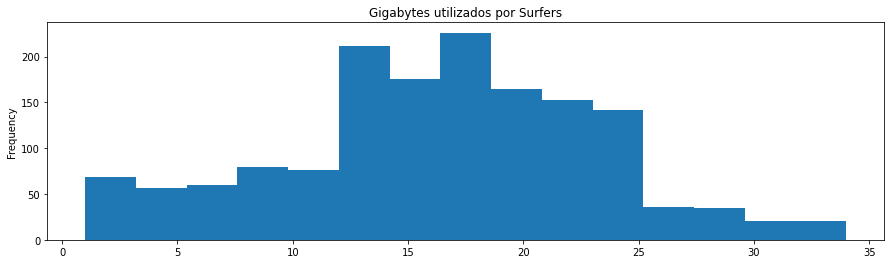

In [ ]:
internet_pivot_surf_filtered['gb_used'].plot(
    kind     = 'hist'
    ,bins    =  15
    ,title   = 'Gigabytes utilizados por Surfers'
    ,figsize = (15, 4)
 )

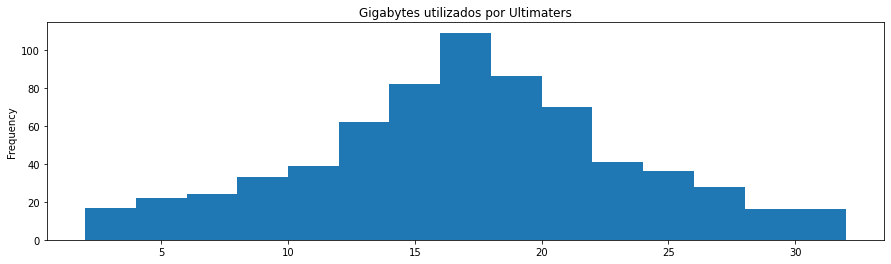

In [ ]:
internet_pivot_ultimate_filtered['gb_used'].plot(
    kind     = 'hist'
    ,bins    =  15
    ,title   = 'Gigabytes utilizados por Ultimaters'
    ,figsize = (15, 4)
 )

Esta distribución parece más normal ahora que hemos descartado los valores atípicos. En el plan Surf para datos de navegación en internet podemos observar que está muy marcado el rango de gb utilizados por los usuarios, vemos que se encuentra de 12 a 25 (Debe ser por el redonde mensual de gb, valdría la pena analizar otras variables de este subgrupo de usuarios dentor de este rango de uso de datos, para otro proyecto). Mientras, en el histograma de uso de datos para los usuarios del grupo que cuentan con plan tarifario Ultimate, la distribución luce más limpia, y podemos apreciar el pico en la media de 17 gb al mes.

## Media, varianza y desviación estándar.
Según el plan y el tipo de servicio utilizado:

In [ ]:
def get_together_param(type_data,name_df_first,name_df_second,name_column):
    data = (
        pd.DataFrame([[type_data,'surf',
                       name_df_first[name_column].mean(),
                       np.std(name_df_first[name_column]),
                       np.var(name_df_first[name_column])
                      ],
                      [type_data,'ultimate',
                       name_df_second[name_column].mean(),
                       np.std(name_df_second[name_column]),
                       np.var(name_df_second[name_column])
                      ]], columns = ['type','plan','mean','std','var']))    
    return data   

In [ ]:
description_data = get_together_param('Calls',
                                      calls_pivot_surf_filtered,
                                      calls_pivot_ultimate_filtered,
                                      'duration_calls')
messages_data = get_together_param('Messages',
                                   message_pivot_surf_filtered,
                                   message_pivot_ultimate_filtered,
                                   'message_date')
internet_data = get_together_param('Data',
                                   internet_pivot_surf_filtered,
                                   internet_pivot_ultimate_filtered,
                                   'gb_used')

description_data = description_data.append(messages_data, ignore_index=True)
description_data = description_data.append(internet_data, ignore_index=True)
description_data = description_data.pivot_table(index = ['type','plan'])

description_data

mean         std           var
type     plan                                          
Calls    surf      423.438944  209.114921  43729.050233
         ultimate  418.265805  210.976444  44511.060095
Data     surf       16.299869    6.808207     46.351680
         ultimate   16.549192    6.317889     39.915715
Messages surf       35.577417   25.190485    634.560517
         ultimate   44.138112   29.635964    878.290366

Ahora con la tabla anterior podemos observar la comparación de los valores estadísticos en `mean`, `std` y `var`para cada plan y por cada uno de los 3 servicios: imnutos de llamada, mensajes y gb de datos de navegación.

**Dentro de la sección de llamadas `Calls`** podemos apreciar que el plan Surf tiene una media más elevada que el Ultimate, lo cual debe ocurrir por la cantidad de usuarios en ese grupo y las duraciones que pudieron haber sido mayores que las del otro plan. LA desviación estándar es menor en Surf, lo cuál quiere decir que los valores de este grupo se encuentran más cercanos a la media que los del plan Ultimate, ocurre lo mismo con la varianza.

**Para la sección `Data`** la media y la desviación estándar son muy parecidas, apesar de la diferencia en la cantidad de usuarios el comportamiento en navegación es similar para ambos grupos, pero hay mayor dispersión de datos (mayor varianza) en el plan Surf.

**En cuanto a `Messages`** tenemos valores más altos en los estadísticos por la diferencia marcada en el histograma donde observamos que los usuarios del plan Ultimate parecen envíar más mensajes al mes, por la diferencia en la cantidad y el número de datos que hay, la dispersión de los datos es mayor y se encuentran más alejados de la media.

<div class="alert alert-block alert-info">
Explicadísimo.
</div>

In [ ]:
len(users[users['plan'] == 'surf'])/500 * 100

67.80000000000001

In [ ]:
len(users[users['plan'] == 'ultimate'])/500 * 100

32.2

En esta tabla podemos observar el comportamiento de los clientes de acuerdo con el plan de tarifas que tienen contratado.
* Empecemos por la proporción de usuarios, tenemos en la muestra 68% de surfers y 31% de Ultimaters.
* Tienen en promedio los Surfers un total de minutos al mes de 423, mientras que los Ultimaters en promedio utilizan 418 minutos al mes.
* En mensajes, los Surfers envían en promedio 35 y los Ultimaters 44.
* Los Surfers utilizan 190gb y Ultimaters 173gb.

## **Paso 4. Prueba de hipótesis**
1. **El ingreso promedio de los usuarios de las tarifas Ultimate y Surf**

Aquí vamos a considerar como hipótesis nula que el ingreso promedio de los usuarios de las tarifas difiere, y como hipótesis alternativa vamos a tomar en cuenta que el ingreso promedio de los usuarios de ambas tarifas es igual. Vamos a utilizar un t-test y alpha=0.05 como nivel de significancia para comparar estos dos grupos de usuarios.

In [ ]:
summary_users.query('plan == "surf"')['profit'].mean() # Promedio de ingresos gracias a los surfers

58.71496516782774

In [ ]:
summary_users.query('plan == "ultimate"')['profit'].mean() # Promedio de ingresos gracias a los ultimaters

72.3011049723757

In [ ]:
surf = summary_users.query('plan == "surf"')
ultimate = summary_users.query('plan == "ultimate"')

In [ ]:
surf_profit = surf['profit']
surf_profit

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2298    100.00
2299     20.00
2300     70.00
2301     40.00
2302     90.00
Name: profit, Length: 1579, dtype: float64

In [ ]:
ultimate_profit = ultimate['profit']
ultimate_profit

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2268    70.0
2269    70.0
2270    70.0
2271    70.0
2287    70.0
Name: profit, Length: 724, dtype: float64

* **H⁰: **El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual.**
* **H¹: **El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.**

In [ ]:
alpha = 0.05

# Prueba de hipótesis para ver si sí es igual
results = st.ttest_ind(ultimate_profit, surf_profit, equal_var = True)
print('La probabilidad es de: {}'.format(results.pvalue))

# o si no
if (results.pvalue < alpha):
    print('Rechazamos hipótesis nula')
else:
    print('No rechazamos hipótesis nula')

La probabilidad es de: 3.8676390411339405e-11
Rechazamos hipótesis nula


Rechazar la hipótesis nula en esta prueba nos da como resultado que tomaremos la hipótesis alternativa comov erdadera, en la que el ingreso promeido de los usuarios de las dos tarifas difiere significativamente.

2. **El ingreso promedio de los usuarios en el área de NY-NJ vs las demás:** Aquí  también vamos a utilizar un t-test y alpha=0.05 como nivel de significancia para comparar estos dos grupos de usuarios. Nuestras hipótesis son:

* **H⁰: El ingreso promedio de los usuarios en el área de NY-NJ vs otras regione es igual.**
* **H¹: El ingreso promedio de los usuarios en el área de NY-NJ vs otras regiones difiere.**

In [ ]:
ny_nj = summary_users.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['profit']
aint_ny_nj = summary_users.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['profit']
print('Promedio de ingresos en NY-NJ: ${:.2f}'.format(ny_nj.mean()))
print('Promedio de ingresos everywhere else: ${:.2f}'.format(aint_ny_nj.mean()))

Promedio de ingresos en NY-NJ: $58.60
Promedio de ingresos everywhere else: $63.85


In [ ]:
alpha = 0.05

# Prueba de hipótesis para ver si es diferente
results = st.ttest_ind(ny_nj, aint_ny_nj, equal_var = True)
print('La probabilidad es de: {}'.format(results.pvalue))

# o si sí
if (results.pvalue < alpha):
    print('Rechazamos hipótesis nula') # No tuvimos razón
else:
    print('No rechazamos hipótesis nula') # Sí tuvimos razón

La probabilidad es de: 0.042665861485584725
Rechazamos hipótesis nula


## **Paso 5. Conclusión**

* Orgnaizamos y filtramos los datos de tal manera que separamos los 3 servicios de megaline: llamadas, mensajes y gb de navegación por plan (surf y ultimate).
* Obtuvimos la cantidad en las unidades correspondientes (minutos, mensajes y gb) para cada servicio y calculado por usuario por mes.
* También obtuvimos la ganancia por cada usuario de megaline a partir del uso que le da a los 3 servicios en su plan tarifario. Todo convirtiéndolo a los tipos de datos necesarios y filtrandolos.
* Hicimos unas pruebas de T para 2 hipótesis nulas que fueron rechazadas. Ambas nos hacen saber que los ingresos promedio de los usuarios sí difieren significativamente en cuanto a el plan o la región en la que utilicen los servicios.
* Invertir en publicidad sería con el objetivo de incrementar los ingresos promedio del plan surf y de los usuarios que se encuentran en la región NY-NJ.